Sella Rabila | 0110218109 | TI 2017 Sore

1. Deteksi Missing Values
2. Perbaiki Missing Values
3. Ubah Label Kategori menjadi nilai angka
4. Deteksi outliner
Sesuaikan satuan/skala pada tiap atribut atau normalisasi







In [5]:
import numpy as np
import pandas as pd

dataset = pd.read_excel('SuperStoreUS 2015 Tugas.xlsx')

dataset

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Sub-Category,Product Container,Product Name,Product Base Margin,Country,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,Pens & Art Supplies,Wrap Bag,SANFORD Liquid Accent™ Tank-Style Highlighters,0.54,United States,West,Washington,Anacortes,98221.0,2015-01-07,2015-01-08,4.5600,4,13.01,88522
1,20228,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,Chairs & Chairmats,Jumbo Drum,Global Troy™ Executive Leather Low-Back Tilter,0.60,United States,West,California,San Gabriel,91776.0,2015-06-13,2015-06-15,4390.3665,12,6362.85,90193
2,21776,Critical,0.06,9.48,7.29,11,Marcus Dunlap,Regular Air,Home Office,Furniture,Office Furnishings,Small Pack,"DAX Two-Tone Rosewood/Black Document Frame, De...",0.45,United States,East,New Jersey,Roselle,7203.0,2015-02-15,2015-02-17,-53.8096,22,211.15,90192
3,24844,Medium,0.09,78.69,19.99,14,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,Office Furnishings,Small Box,Howard Miller 12-3/4 Diameter Accuwave DS ™ Wa...,0.43,United States,Central,Minnesota,Prior Lake,55372.0,2015-05-12,2015-05-14,803.4705,16,1164.45,86838
4,24846,Medium,0.08,3.28,2.31,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,Pens & Art Supplies,Wrap Bag,Newell 321,0.56,United States,Central,Minnesota,Prior Lake,55372.0,2015-05-12,2015-05-13,-24.0300,7,22.23,86838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1947,19842,High,0.01,10.90,7.46,3397,Andrea Shaw,Regular Air,Small Business,Office Supplies,Storage & Organization,Small Box,Crate-A-Files™,0.59,United States,Central,Illinois,Danville,61832.0,2015-03-11,2015-03-12,-116.7600,18,207.31,87536
1948,19843,High,0.10,7.99,5.03,3397,Andrea Shaw,Regular Air,Small Business,Technology,Telephones and Communication,Medium Box,Bell Sonecor JB700 Caller ID,0.60,United States,Central,Illinois,Danville,61832.0,2015-03-11,2015-03-12,-160.9520,22,143.12,87536
1949,26208,Not Specified,0.08,11.97,5.81,3399,Marvin Reid,Regular Air,Small Business,Office Supplies,Pens & Art Supplies,Small Pack,Staples SlimLine Pencil Sharpener,0.60,United States,Central,Illinois,Des Plaines,60016.0,2015-03-29,2015-03-31,-41.8700,5,59.98,87534
1950,24911,Medium,0.10,9.38,4.93,3400,Florence Gold,Express Air,Small Business,Furniture,Office Furnishings,Small Box,Eldon Expressions Punched Metal & Wood Desk Ac...,0.57,United States,East,West Virginia,Fairmont,26554.0,2015-04-04,2015-04-04,-24.7104,15,135.78,87537


1. Deteksi Missing Values

In [6]:
dataset.apply(lambda x: sum(x.isnull()), axis=0)

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     16
Country                  0
Region                   1
State or Province        0
City                     0
Postal Code              1
Order Date               0
Ship Date                0
Profit                   1
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

2. Perbaiki Missing Values

In [10]:
dataset['Product Base Margin'].fillna(dataset['Product Base Margin'].mean(), inplace=True)
dataset['Region'].fillna(dataset['Region'].mode(), inplace=True)
dataset['Postal Code'].fillna(dataset['Postal Code'].mean(), inplace=True)
dataset['Profit'].fillna(dataset['Profit'].mean(), inplace=True)

dataset

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Sub-Category,Product Container,Product Name,Product Base Margin,Country,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,Pens & Art Supplies,Wrap Bag,SANFORD Liquid Accent™ Tank-Style Highlighters,0.54,United States,West,Washington,Anacortes,98221.0,2015-01-07,2015-01-08,4.5600,4,13.01,88522
1,20228,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,Chairs & Chairmats,Jumbo Drum,Global Troy™ Executive Leather Low-Back Tilter,0.60,United States,West,California,San Gabriel,91776.0,2015-06-13,2015-06-15,4390.3665,12,6362.85,90193
2,21776,Critical,0.06,9.48,7.29,11,Marcus Dunlap,Regular Air,Home Office,Furniture,Office Furnishings,Small Pack,"DAX Two-Tone Rosewood/Black Document Frame, De...",0.45,United States,East,New Jersey,Roselle,7203.0,2015-02-15,2015-02-17,-53.8096,22,211.15,90192
3,24844,Medium,0.09,78.69,19.99,14,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,Office Furnishings,Small Box,Howard Miller 12-3/4 Diameter Accuwave DS ™ Wa...,0.43,United States,Central,Minnesota,Prior Lake,55372.0,2015-05-12,2015-05-14,803.4705,16,1164.45,86838
4,24846,Medium,0.08,3.28,2.31,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,Pens & Art Supplies,Wrap Bag,Newell 321,0.56,United States,Central,Minnesota,Prior Lake,55372.0,2015-05-12,2015-05-13,-24.0300,7,22.23,86838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1947,19842,High,0.01,10.90,7.46,3397,Andrea Shaw,Regular Air,Small Business,Office Supplies,Storage & Organization,Small Box,Crate-A-Files™,0.59,United States,Central,Illinois,Danville,61832.0,2015-03-11,2015-03-12,-116.7600,18,207.31,87536
1948,19843,High,0.10,7.99,5.03,3397,Andrea Shaw,Regular Air,Small Business,Technology,Telephones and Communication,Medium Box,Bell Sonecor JB700 Caller ID,0.60,United States,Central,Illinois,Danville,61832.0,2015-03-11,2015-03-12,-160.9520,22,143.12,87536
1949,26208,Not Specified,0.08,11.97,5.81,3399,Marvin Reid,Regular Air,Small Business,Office Supplies,Pens & Art Supplies,Small Pack,Staples SlimLine Pencil Sharpener,0.60,United States,Central,Illinois,Des Plaines,60016.0,2015-03-29,2015-03-31,-41.8700,5,59.98,87534
1950,24911,Medium,0.10,9.38,4.93,3400,Florence Gold,Express Air,Small Business,Furniture,Office Furnishings,Small Box,Eldon Expressions Punched Metal & Wood Desk Ac...,0.57,United States,East,West Virginia,Fairmont,26554.0,2015-04-04,2015-04-04,-24.7104,15,135.78,87537


3. Ubah Label Kategori menjadi nilai angka

In [14]:
dataset['Order Priority'] = dataset['Order Priority'].astype('category').cat.codes
dataset['Customer Name'] = dataset['Customer Name'].astype('category').cat.codes
dataset['Ship Mode'] = dataset['Ship Mode'].astype('category').cat.codes
dataset['Customer Segment'] = dataset['Customer Segment'].astype('category').cat.codes
dataset['Product Category'] = dataset['Product Category'].astype('category').cat.codes
dataset['Product Sub-Category'] = dataset['Product Sub-Category'].astype('category').cat.codes
dataset['Product Container'] = dataset['Product Container'].astype('category').cat.codes
dataset['Product Name'] = dataset['Product Name'].astype('category').cat.codes
dataset['Country'] = dataset['Country'].astype('category').cat.codes
dataset['State or Province'] = dataset['State or Province'].astype('category').cat.codes
dataset['City'] = dataset['City'].astype('category').cat.codes

dataset

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Sub-Category,Product Container,Product Name,Product Base Margin,Country,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,20847,2,0.01,2.84,0.93,3,107,1,1,1,11,6,665,0.54,0,West,45,16,98221.0,2015-01-07,2015-01-08,4.5600,4,13.01,88522
1,20228,5,0.02,500.98,26.00,5,934,0,2,0,3,1,408,0.60,0,West,3,691,91776.0,2015-06-13,2015-06-15,4390.3665,12,6362.85,90193
2,21776,0,0.06,9.48,7.29,11,716,2,2,0,8,5,257,0.45,0,East,28,666,7203.0,2015-02-15,2015-02-17,-53.8096,22,211.15,90192
3,24844,4,0.09,78.69,19.99,14,410,2,3,0,8,4,469,0.43,0,Central,21,626,55372.0,2015-05-12,2015-05-14,803.4705,16,1164.45,86838
4,24846,4,0.08,3.28,2.31,14,410,2,3,1,11,6,572,0.56,0,Central,21,626,55372.0,2015-05-12,2015-05-13,-24.0300,7,22.23,86838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1947,19842,2,0.01,10.90,7.46,3397,38,2,3,1,14,4,251,0.59,0,Central,11,171,61832.0,2015-03-11,2015-03-12,-116.7600,18,207.31,87536
1948,19843,2,0.10,7.99,5.03,3397,38,2,3,2,16,3,182,0.60,0,Central,11,171,61832.0,2015-03-11,2015-03-12,-160.9520,22,143.12,87536
1949,26208,5,0.08,11.97,5.81,3399,753,2,3,1,11,5,718,0.60,0,Central,11,183,60016.0,2015-03-29,2015-03-31,-41.8700,5,59.98,87534
1950,24911,4,0.10,9.38,4.93,3400,343,1,3,0,8,4,295,0.57,0,East,46,234,26554.0,2015-04-04,2015-04-04,-24.7104,15,135.78,87537


4. Deteksi outliner
Sesuaikan satuan/skala pada tiap atribut atau normalisasi

In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                1952 non-null   int64         
 1   Order Priority        1952 non-null   int8          
 2   Discount              1952 non-null   float64       
 3   Unit Price            1952 non-null   float64       
 4   Shipping Cost         1952 non-null   float64       
 5   Customer ID           1952 non-null   int64         
 6   Customer Name         1952 non-null   int16         
 7   Ship Mode             1952 non-null   int8          
 8   Customer Segment      1952 non-null   int8          
 9   Product Category      1952 non-null   int8          
 10  Product Sub-Category  1952 non-null   int8          
 11  Product Container     1952 non-null   int8          
 12  Product Name          1952 non-null   int16         
 13  Product Base Margi

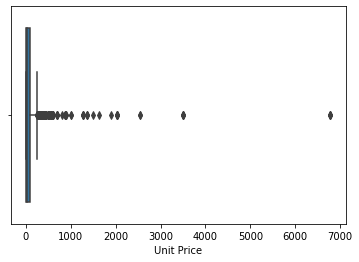

In [15]:
import seaborn as sns
sns.boxplot(x=dataset['Unit Price'])

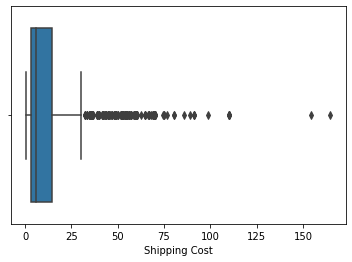

In [16]:
import seaborn as sns
sns.boxplot(x=dataset['Shipping Cost'])

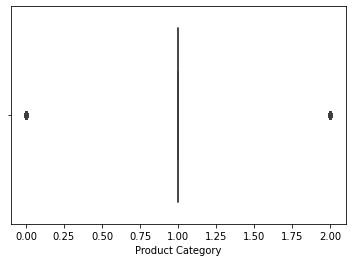

In [17]:
import seaborn as sns
sns.boxplot(x=dataset['Product Category'])

In [19]:
from sklearn .preprocessing import Normalizer
dataset.describe()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Sub-Category,Product Container,Product Name,Product Base Margin,Country,State or Province,City,Postal Code,Profit,Quantity ordered new,Sales,Order ID
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.0,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,19916.479508,2.797643,0.048975,109.079221,12.968151,1735.376537,565.461578,1.595287,1.428279,1.041496,8.258709,3.763320,452.115266,0.515186,0.0,22.157275,428.353996,51527.097899,114.921226,12.944672,985.828832,82365.924180
std,5957.595627,1.721970,0.031378,393.481301,17.414631,991.078006,326.462337,0.723153,1.031030,0.670702,4.975303,1.611188,264.345088,0.136492,0.0,14.558930,248.299269,29360.872123,1141.098512,13.871565,2559.900167,19042.295798
min,64.000000,0.000000,0.000000,1.140000,0.490000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.350000,0.0,0.000000,0.000000,1001.000000,-16476.838000,1.000000,2.250000,359.000000
25%,19121.000000,2.000000,0.020000,6.480000,3.230000,875.000000,285.000000,1.000000,1.000000,1.000000,4.000000,4.000000,216.000000,0.380000,0.0,8.000000,201.000000,28560.000000,-83.921900,5.000000,58.807500,86767.750000
50%,21164.500000,3.000000,0.050000,20.990000,6.150000,1738.000000,564.500000,2.000000,1.000000,1.000000,9.000000,4.000000,450.500000,0.520000,0.0,20.000000,436.000000,48765.500000,1.648450,10.000000,202.395000,88376.000000
75%,23483.250000,4.000000,0.080000,100.972500,14.362500,2578.250000,842.000000,2.000000,2.000000,1.000000,11.000000,5.000000,679.000000,0.590000,0.0,35.000000,642.000000,78550.000000,116.201575,16.000000,802.945000,89957.000000
max,26389.000000,5.000000,0.210000,6783.020000,164.730000,3403.000000,1129.000000,2.000000,3.000000,2.000000,16.000000,6.000000,912.000000,0.850000,0.0,48.000000,869.000000,99362.000000,9228.225600,167.000000,45737.330000,91586.000000
